📝 Project: Regression on House Price Prediction (Per Unit Area)
In this project, we analyze a real-world dataset containing information about residential property transactions. The dataset includes features such as transaction date, house age, proximity to MRT stations, number of nearby convenience stores, and geographic coordinates. Our goal is to develop a machine learning pipeline that predicts the house price per unit area, enabling data-driven property valuation.

🎯 Objective
The objective of this project is to build and evaluate regression models that can accurately predict the price per unit area of a house based on its characteristics and location. This prediction model can be valuable for buyers, sellers, and real estate professionals to assess property value and make informed decisions.

🤖 Models Evaluated

- MultiLinear Regression

- Polynomial Regression

- Support Vector Regression (SVR)

- Random Forest Regressor

- Tuned Random Forest Regressor

- XGBoost Regressor


Evaluation Metrics To assess model performance, the following regression metrics are used:

- MAE (Mean Absolute Error)

- MSE (Mean Squared Error)

- RMSE (Root Mean Squared Error)

- These metrics help evaluate the accuracy and consistency of the models in predicting continuous values.

By comparing different regression models, we aim to:

- Identify the most suitable model for predicting house prices

- Understand the influence of geographic and structural factors on property valuation

- Provide actionable insights to support real estate market analysis and pricing strategies



In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("/Users/pravaliparvataneni/Desktop/sudents and projects/S3/Reression/Real_Estate.csv")

In [4]:
data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [4]:
data.isna().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


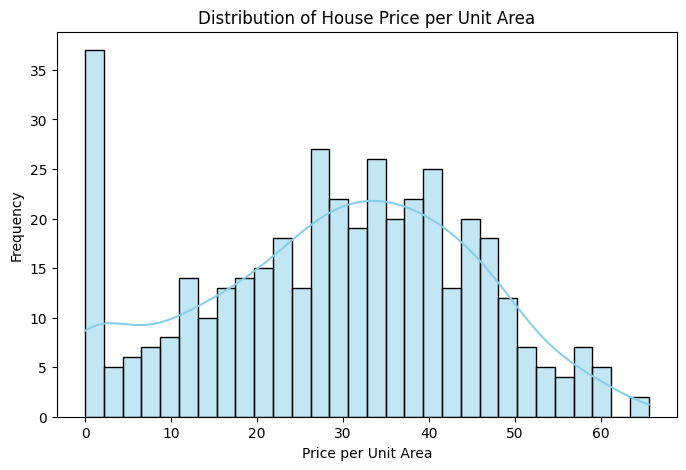

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data['House price of unit area'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Price per Unit Area')
plt.xlabel('Price per Unit Area')
plt.ylabel('Frequency')
plt.show()


- The distribution is right-skewed, indicating that most houses are priced in a lower to mid-range.

- A few high-priced properties (outliers) significantly raise the upper range.

- Pricing appears to follow a semi-normal pattern but with long tails, suggesting the need for scaling or transformation before modeling.



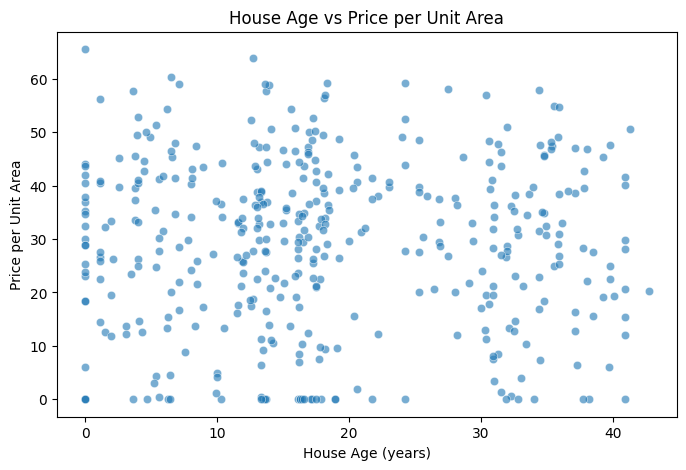

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='House age', y='House price of unit area', data=data, alpha=0.6)
plt.title('House Age vs Price per Unit Area')
plt.xlabel('House Age (years)')
plt.ylabel('Price per Unit Area')
plt.show()


- There is a slight negative correlation: newer houses tend to have higher prices, while older houses are generally cheaper.

- However, the relationship isn't perfectly linear — other factors (like location) may be influencing price more strongly.

- Suggests that house age does influence price, but not in isolation.

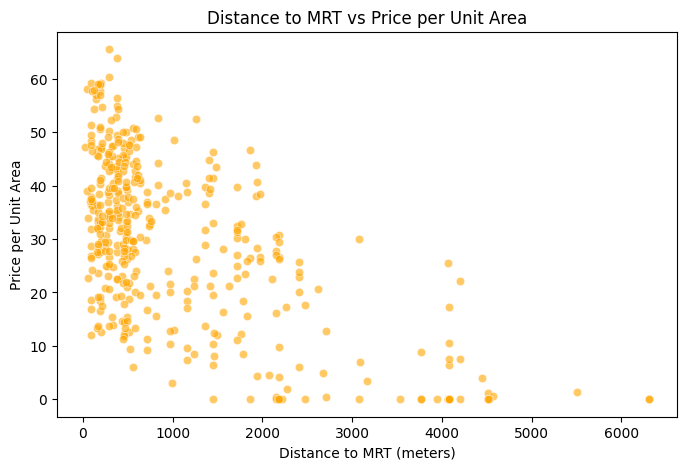

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Distance to the nearest MRT station', y='House price of unit area', data=data, alpha=0.6, color='orange')
plt.title('Distance to MRT vs Price per Unit Area')
plt.xlabel('Distance to MRT (meters)')
plt.ylabel('Price per Unit Area')
plt.show()


- There is a clear negative correlation: the closer a house is to an MRT station, the higher its price per unit area.

- Prices drop significantly as distance increases, supporting the importance of public transport access in real estate value.

- This is a key predictor feature for price modeling.

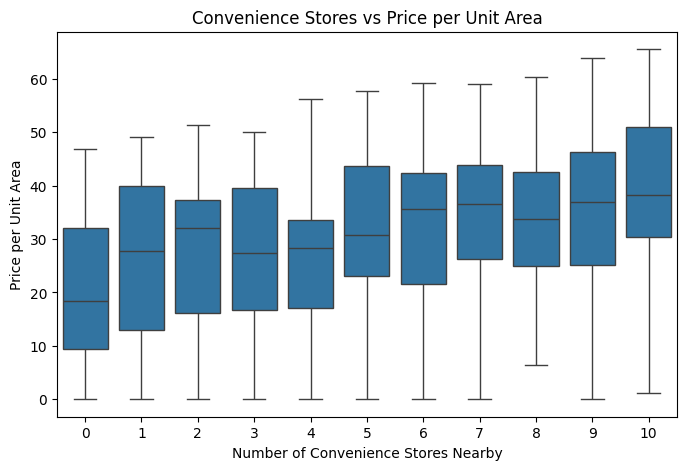

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Number of convenience stores', y='House price of unit area', data=data)
plt.title('Convenience Stores vs Price per Unit Area')
plt.xlabel('Number of Convenience Stores Nearby')
plt.ylabel('Price per Unit Area')
plt.show()


- Houses near more convenience stores (especially 5 or more) generally have higher median prices.

- However, the relationship is not strictly increasing — too many stores may not significantly raise value further.

- Suggests local amenities have an impact, but with diminishing returns.

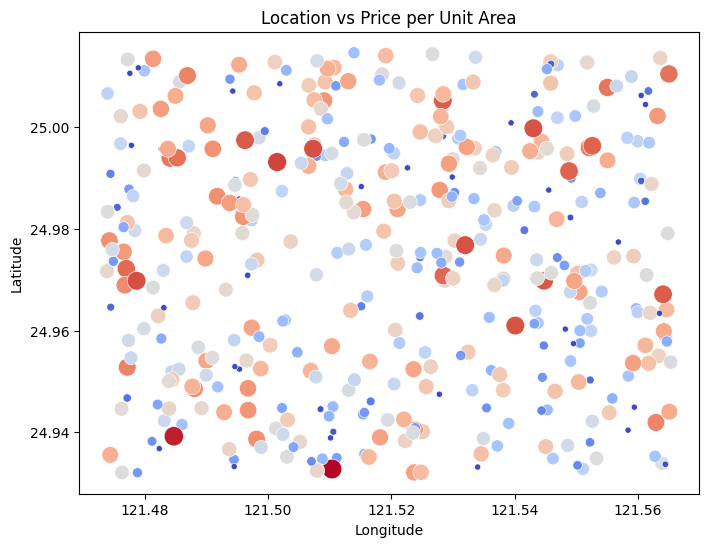

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='House price of unit area', size='House price of unit area',
                data=data, palette='coolwarm', sizes=(20, 200), legend=False)
plt.title('Location vs Price per Unit Area')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


- Houses in certain geographic clusters (specific combinations of lat/lon) have consistently higher prices.

- Suggests that neighborhood or region is a strong determinant of price.

- Could inform spatial clustering or regional analysis for targeted investment or development.

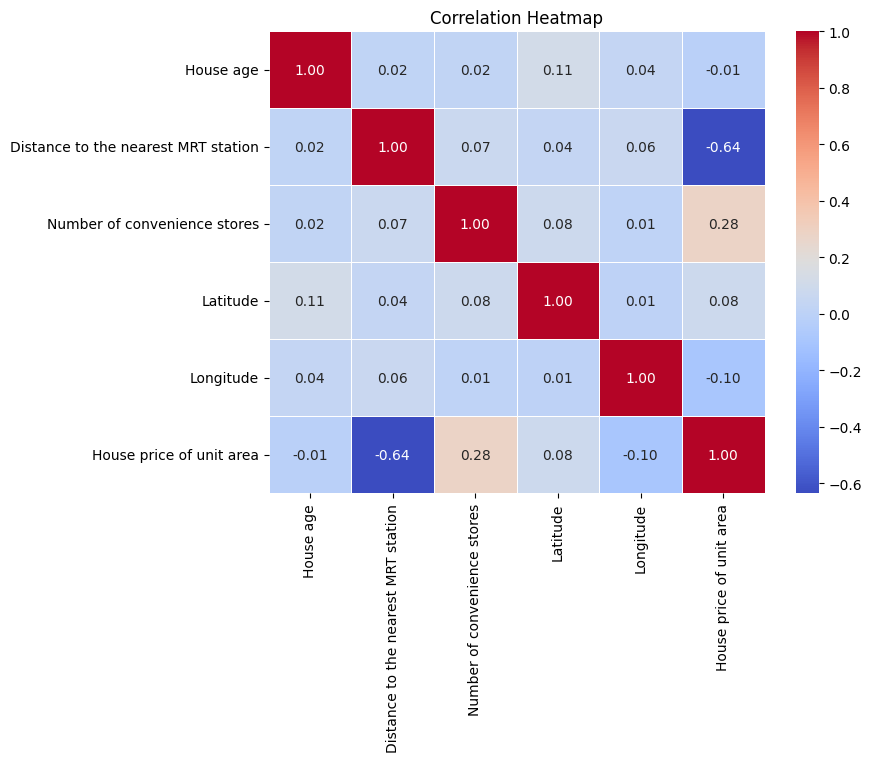

In [11]:
plt.figure(figsize=(8, 6))
corr = data.drop(columns=['Transaction date']).corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Distance to MRT has a strong negative correlation with price.

- Number of convenience stores has a moderate positive correlation.

- House age has a mild negative correlation.

- These findings validate earlier plots and highlight the most impactful features.


In [8]:
# Step 1: Convert to datetime
data['Transaction date'] = pd.to_datetime(data['Transaction date'], errors='coerce')

# Step 2: Extract date features
data['Transaction_Year'] = data['Transaction date'].dt.year
data['Transaction_Month'] = data['Transaction date'].dt.month
data['Transaction_Quarter'] = data['Transaction date'].dt.quarter
data['Transaction_Day'] = data['Transaction date'].dt.day
data['Transaction_Hour'] = data['Transaction date'].dt.hour  # Optional


In [9]:
print(data[['Transaction date', 'Transaction_Year', 'Transaction_Month', 'Transaction_Quarter']].head())


            Transaction date  Transaction_Year  Transaction_Month  \
0 2012-09-02 16:42:30.519336              2012                  9   
1 2012-09-04 22:52:29.919544              2012                  9   
2 2012-09-05 01:10:52.349449              2012                  9   
3 2012-09-05 13:26:01.189083              2012                  9   
4 2012-09-06 08:29:47.910523              2012                  9   

   Transaction_Quarter  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3  


In [10]:
data = data.drop(columns=['Transaction date'])

In [12]:
from sklearn.preprocessing import StandardScaler


X = data.drop(columns=['House price of unit area'])  
y = data['House price of unit area']

# Step 2: Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Multilinear

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_lr)
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)

print("🔹 Multiple Linear Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_lr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Multiple Linear Regression
MAE: 9.697216067833597
MSE: 130.90926257186825
RMSE: 11.441558572671306
🔹 R² Score (Accuracy for Regression): 0.5267919722636416


# Polynomial

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

MAE = mean_absolute_error(y_test, y_pred_poly)
MSE = mean_squared_error(y_test, y_pred_poly)
RMSE = np.sqrt(MSE)

print("\n🔸 Polynomial Regression (Degree=2)")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)



🔸 Polynomial Regression (Degree=2)
MAE: 10.009073015783484
MSE: 145.73286244841677
RMSE: 12.071986681918464


# SVR

In [19]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
RMSE = np.sqrt(MSE)

print("\n🔹 Support Vector Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)

r2 = r2_score(y_test, y_pred_svr)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔹 Support Vector Regression
MAE: 12.236205528444147
MSE: 202.09509423166713
RMSE: 14.216015413317022
🔹 R² Score (Accuracy for Regression): 0.2694709367562219


# RandomForest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_rf)
MSE = mean_squared_error(y_test, y_pred_rf)
RMSE = np.sqrt(MSE)

print("\n🔸 Random Forest Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_rf)
print("🔹 R² Score (Accuracy for Regression):", r2)



🔸 Random Forest Regression
MAE: 9.622129804709004
MSE: 128.11024739235174
RMSE: 11.318579742721775
🔹 R² Score (Accuracy for Regression): 0.5369097930097175


# XGB

In [23]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred_xgb)
MSE = mean_squared_error(y_test, y_pred_xgb)
RMSE = np.sqrt(MSE)

print("\n🔹 XGBoost Regression")
print("MAE:", MAE)
print("MSE:", MSE)
print("RMSE:", RMSE)
r2 = r2_score(y_test, y_pred_xgb)
print("🔹 R² Score (Accuracy for Regression):", r2)


🔹 XGBoost Regression
MAE: 9.860497250107224
MSE: 143.83686710061045
RMSE: 11.993200869684891
🔹 R² Score (Accuracy for Regression): 0.4800615414124001


In [24]:
import matplotlib.pyplot as plt

# Store error values for each model
model_names = ['Linear', 'Polynomial','SVR', 'Random Forest','XGBoost']

mae_values = [
    mean_absolute_error(y_test, y_pred_lr),      # Linear Regression
    mean_absolute_error(y_test, y_pred_poly),    # Polynomial Regression 
    mean_absolute_error(y_test, y_pred_svr),     # SVR
    mean_absolute_error(y_test, y_pred_rf),      # Random Forest
    mean_absolute_error(y_test, y_pred_xgb)      # XGBoost
]

mse_values = [
    mean_squared_error(y_test, y_pred_lr),
    mean_squared_error(y_test, y_pred_poly),
    mean_squared_error(y_test, y_pred_svr),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_xgb)
]

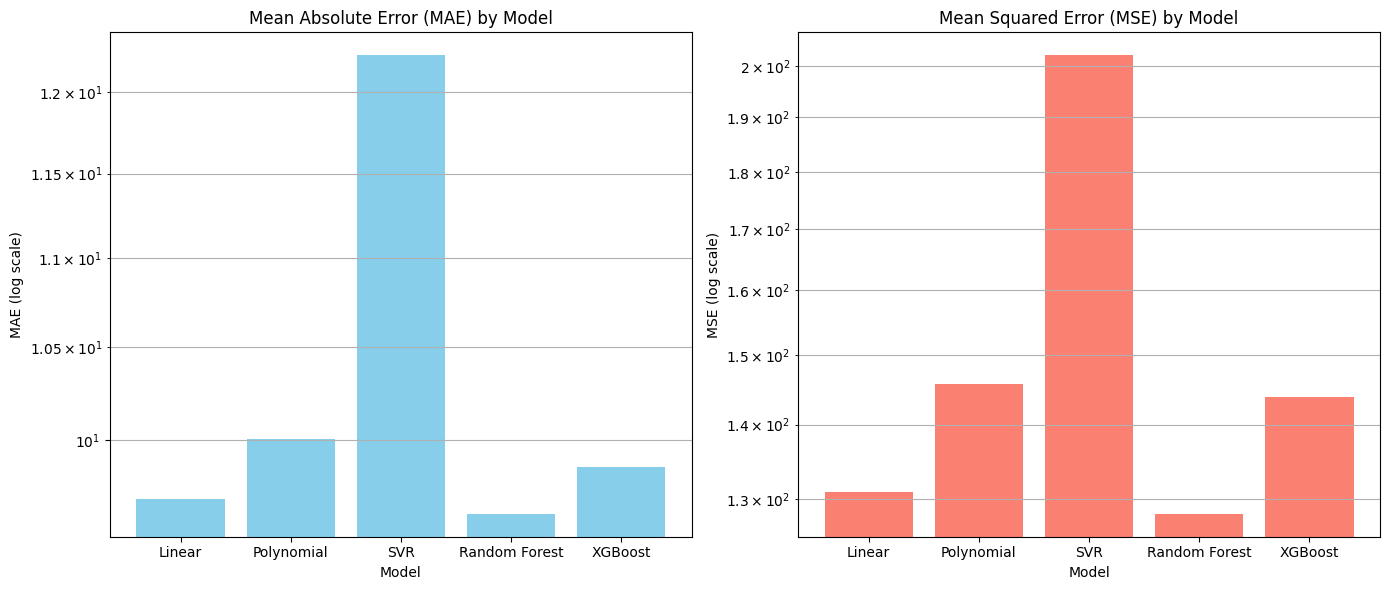

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# MAE Plot (log scale)
axs[0].bar(model_names, mae_values, color='skyblue')
axs[0].set_title("Mean Absolute Error (MAE) by Model")
axs[0].set_ylabel("MAE (log scale)")
axs[0].set_xlabel("Model")
axs[0].set_yscale('log')  # ✅ log scale
axs[0].grid(axis='y', which='both')

# MSE Plot (log scale)
axs[1].bar(model_names, mse_values, color='salmon')
axs[1].set_title("Mean Squared Error (MSE) by Model")
axs[1].set_ylabel("MSE (log scale)")
axs[1].set_xlabel("Model")
axs[1].set_yscale('log')  # ✅ log scale
axs[1].grid(axis='y', which='both')

plt.tight_layout()
plt.show()


Overall, the plot suggests that the XGBoost model is likely the best choice for this real estate dataset, followed closely by the Random Forest model. The SVR model should be avoided due to its poor perfomance.